# Visualization 1: Using Python

In [10]:
import requests
import pandas as pd
import zipfile
import io

In [11]:
# Setting the base URL for Toronto's CKAN instance
base_url = "https://ckan0.cf.opendata.inter.prod-toronto.ca"
url = base_url + "/api/3/action/package_show"
params = {"id": "surface-routes-and-schedules-for-bustime"}

# Retrieve the package metadata
package = requests.get(url, params=params).json()


In [12]:
# Print out the metadata for all resources to identify the correct one
for idx, resource in enumerate(package["result"]["resources"]):
    print(f"Resource {idx}:")
    print(f"  Name: {resource['name']}")
    print(f"  Format: {resource['format']}")
    print(f"  URL: {resource['url']}\n")

Resource 0:
  Name: SurfaceGTFS
  Format: ZIP
  URL: https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/bd4809dd-e289-4de8-bbde-c5c00dafbf4f/resource/28514055-d011-4ed7-8bb0-97961dfe2b66/download/surfacegtfs.zip



In [13]:
# Assuming the correct resource is identified (adjust the index if needed)
resource_url = package["result"]["resources"][0]["url"]

# Download and extract the ZIP file
response = requests.get(resource_url)
with zipfile.ZipFile(io.BytesIO(response.content)) as the_zip:
    # Extract specific relevant files
    file_names = ['routes.txt', 'trips.txt', 'stop_times.txt']
    extracted_files = {name: pd.read_csv(the_zip.open(name)) for name in file_names}

In [14]:
# Merging relevant datasets
routes_df = extracted_files['routes.txt']
trips_df = extracted_files['trips.txt']

# Merge routes and trips on 'route_id'
merged_df = pd.merge(trips_df, routes_df, on='route_id')

# Group by route_id and count the number of trips
trip_counts = merged_df.groupby('route_id').size().reset_index(name='trip_count')


In [16]:
merged_df.to_csv ("ShuttleBue_updated.csv")

In [17]:
# Set up Visualization: plotting the number of trips per route

import matplotlib.pyplot as plt
import seaborn as sns

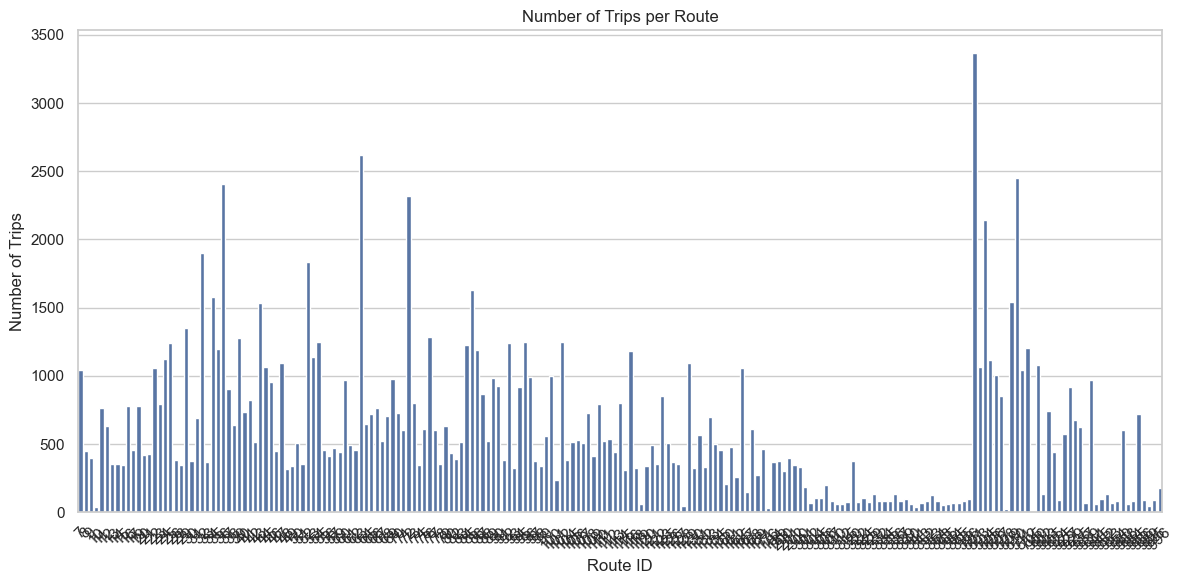

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(data=trip_counts, x='route_id', y='trip_count')
plt.title('Number of Trips per Route')
plt.xlabel('Route ID')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('number_of_trips_per_route.png')
plt.show()